# Hyperparameter Optimization with Hyperopt-Into & Implementation

Hyperparameter Optimization is the process of identifying the best combination of hyperparameters for a machine learning
model to satisfy an objective function, which is usually defined as "minimizing" the objective function for consistency.

1. Objective Function: accepts a combination of hyperparameters as input and returns the mimized error/loss.
2. Search Space: Function Arguments
3. Optimization Algorithm: Like random search and Tree of Parzen Estimators(TPE) etc.

In [1]:
pip install hyperopt


     ---------------------------------------- 1.6/1.6 MB 301.4 kB/s eta 0:00:00
     ------------------------------------ 200.5/200.5 kB 406.5 kB/s eta 0:00:00


# Simple Example

# Quadratic function of f(x)=(x-1)2

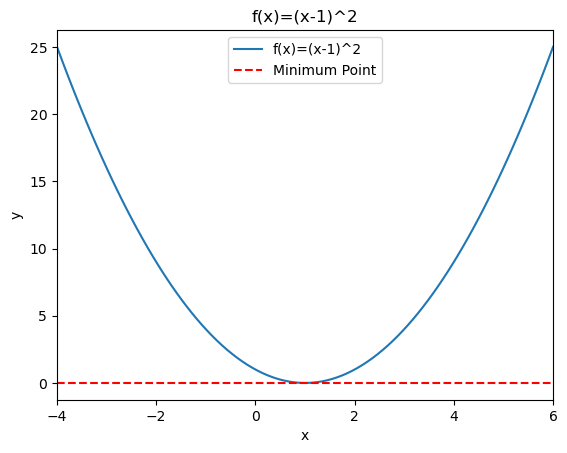

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Define the function
def f(x):
    return(x-1)**2

#Generate x values from -5 to 5
x=np.linspace(-4,6,100)

#Calculate corresponding y values
y=f(x)

#Find the minimum point
min_point=np.min(y)

#Create the plot
plt.plot(x,y,label='f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x)=(x-1)^2')

#Set the x-axis limits
plt.xlim(-4,6)

#Add horizontal dashed line at the minimum point
plt.axhline(y=min_point,color='red',linestyle='dashed',label='Minimum Point')

#Add a legend
plt.legend()

#Display the plot
plt.show()


# As we can see, the minimum point happens where x=1.

Let`s implement this using Hyperopt and see how it works.
In order to do so, we will take the following steps:
1. import necessary libraries and packages
2. define the objective function and the search space
3. run the optimization process
4. print the results(i.e the optimized point that we expect to be x=1)

In [9]:
#1. import necessary libraries and packages

from hyperopt import hp,fmin,tpe,Trials

#2. define the objective function and the search space

def objective_function(x):
    return (x-1)**2
search_space=hp.uniform('x',-2,2)

#3. run the optimization process

#Trails object to store the results

trials=Trials()

#run the optimization

best=fmin(fn=objective_function,space=search_space,algo=tpe.suggest,trials=trails,max_evals=100)


#4. print the results(i.e the optimized point that we expect to be x=1)

print(best)


100%|████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?trial/s, best loss=?]
{'x': 0.9873345471340685}


# best returns the best combination of hyperparameters that the mode was
# able to find and in this case it is almost equal to x=1, as we expected. 

 ______________________________________________________________________________________________________________


# Hyperopt implementation

We will implement two separate examples as follows.
1. A classification with Support Vector Machine
2. A regression with Random Forest Regressor


1. Support Vector Machines and Iris Data Set
with two parameter that we can optimize as follows:
    c: Regularization parameter, which trades off misclassification of 
        training examples against simplicity of the decision surface.
    gamma: Kernel coefficient, which defines how much influence a single training exaple has.
           The larger gamma is, the closer other examples must be to be affected. 

In [11]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

iris=datasets.load_iris()
X=iris.data
y=iris.target


Define objective function and search space

Objective function, which will train an SVM and returns the negetive of the cross-validation score
that is what we want to minimize. Note that we are minimizing the negetive of cross-validation score
to be consistent with the general goal of minimizing the objective function.

In [12]:
def objective_function(parameters):
    clf=SVC(**parameters)
    score=cross_val_score(clf,X,y,cv=5).mean()
    return -score

Next we will define the search space, which consists of the values that our parameters of c and gamma can take.
Note that we will use Hyperopt`s hp.uniform(label,low,high), which returns a value uniformly between  low and high.


In [13]:
search_space={
    'C':hp.uniform('C',0.1,10),
    'gamma':hp.uniform('gamma',0.01,1)
}

# Run Optimization
We will use a TPE algorithm and store the results in a trials object

In [14]:
trials=Trials()

best=fmin(fn=objective_function,space=search_space,algo=tpe.suggest, trials=trials,max_evals=100)


100%|█████████████████████████████████████████████| 100/100 [00:02<00:00, 45.94trial/s, best loss: -0.9866666666666667]


In [15]:
# Visualize Optimization

print(best)

{'C': 6.323329285556576, 'gamma': 0.12538458670925196}


Now we have a combination of hyperparameters that minimize the optimization function using Hyperopt.


Let`s visually look at how the objective function values changes as the hyperparameters change.

We will start with defining a function named plot_obj_vs_hp() that accomplishes this visualization.
Make sure to look for the red dot-- that one indicates the best combination of hyperparameters, according to our
hyperparameter optimization!

In [23]:
import matplotlib.pyplot as plt

def plot_obj_vs_hp(trials,search_space,best):
    
    #Extract the results
    
    results=trials.trials
    
    #Create a list of hyperparameters
    
    hyperparameters=list(search_space.keys())
    
    #Create a new figure with 2 subpots side by side
    
    fig,axes= plt.subplots(1,2,figsize=(12, 6))
    
    #Loop through hyperparameters and generate plots
    
    for idx,hp in enumerate(hyperparameters):
        
        #Extract the values of a given hyperparameter
        
        hp_values=[res['misc']['vals'][f'{hp}'] for res in results]
        
        #Flatten the list of values
        
        hp_values=[item for sublist in hp_values for item in sublist]
        
        #Extract the corresponding objective function values
        
        objective_values=[res['result']['loss'] for res in results]
        
        #Create the scatter plot
        
        axes[idx].scatter(hp_values,objective_values,label='Trial Hyperparameter Combinations')
        
        #Highlight the best hyperparameters
        
        axes[idx].scatter(best[hp],min(objective_values),color='red',label='Best Hyperparameter Combinations')
        axes[idx].set_xlabel(f'{hp}')
        axes[idx].set_ylabel('Loss')
        axes[idx].set_title(f'Loss vs.{hp}')
        axes[idx].legend(loc='upper right')
        
    plt.tight_layout()
    plt.show()

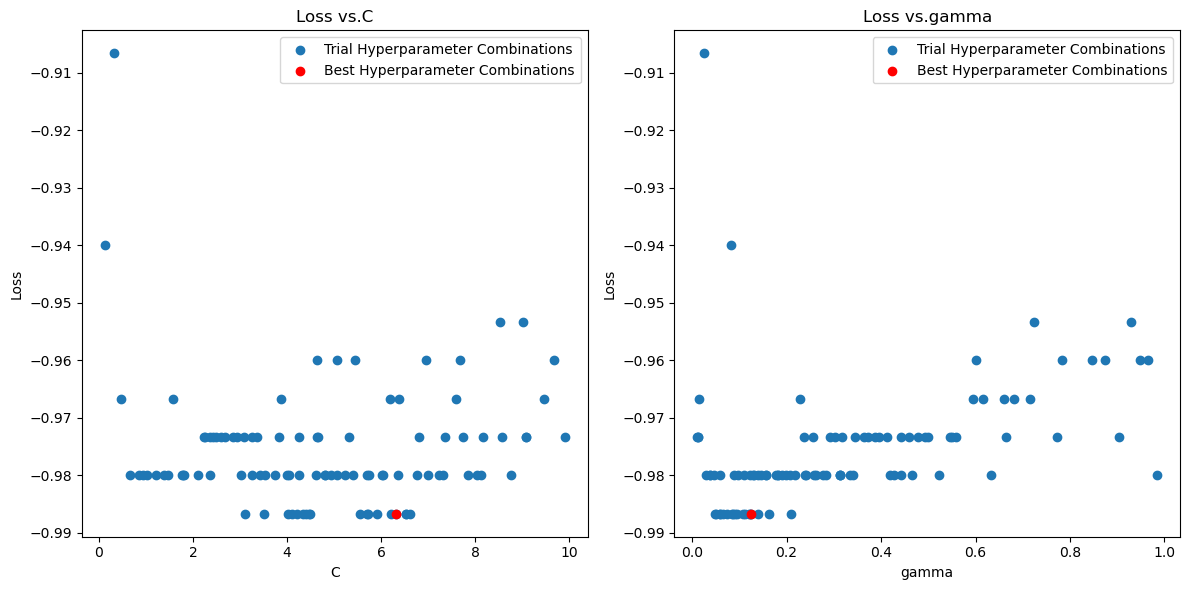

In [24]:
#Plot optimization vs hyperparameters in 2D
plot_obj_vs_hp(trials,search_space,best)

Note that since c and gamma are not really related to each other, we are showing them separately versus changes of the objective function.

Since we want the objective function to be minimized, then we`re looking for the furthest bottom side of the plots
above and based on the results of the hyperparameter optimization, we know that waht we are looking for is
where {'C':6.323329285556576, 'gamma':0.12538458670925196}, which results in an objective function loss of around -0.986 and
is indicated by a red dot.

# I was also curious to look at these plots in a three-dimensional manner so I created the function below to accomplish that.
# Let`s look at the plot

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# define 3D plot function

def plot_obj_vs_hp_3d(trials,search_space,best):
    
    #Extract the results
    
    results=trials.trials
    
    #Create a list of hyperparameters
    
    hyperparameters=list(search_space.keys())
    
    #Extract the values of hyperparameters
    
    hp_values_0=[res['misc']['vals'][f'{hyperparameters[0]}'] for res in results]
    hp_values_1=[res['misc']['vals'][f'{hyperparameters[1]}'] for res in results]
    
    #Flatten the lists of values
    
    hp_values_0=[item for sublist in hp_values_0 for item in sublist]
    hp_values_1=[item for sublist in hp_values_1 for item in sublist]
    
    #Extract the corresponding objective function values
    
    objective_values=[res['result']['loss'] for res in results]
    
    #Create a new figure
    
    fig=plt.figure(figsize=(10,7))
    
    #Add a 3D subplot
    
    ax=fig.add_subplot(111,projection='3d')
    
    #Create the scatter plot
    
    scatter=ax.scatter(hp_values_0,hp_values_1,objective_values,c=objective_values,cmap='viridis',label='Trial hyperparameters')
    
    #Highlight the best hyperparameters
    
    ax.scatter(best[hyperparameters[0]],best[hyperparameters[1]],min(objective_values),color='red',label='Best hyperparameters')
    
    #Add labels using hyperparameters from search_space
    ax.set_xlabel(hyperparameters[0])
    ax.set_ylabel(hyperparameters[1])
    ax.set_zlabel('Loss')
    ax.set_title('Loss Across Hyperparameters')
    fig.colorbar(scatter)
    ax.legend(loc='upper right')
    
    plt.show()
    

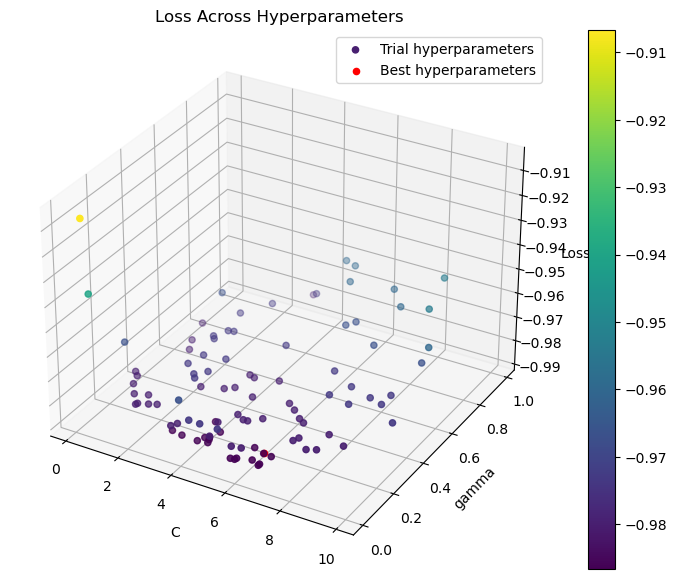

In [33]:
#plot optimization vs. hyperparameters in 3D

plot_obj_vs_hp_3d(trials,search_space,best)

Admittedly, this is not very easy to read but let`s give it a shot. We are looking
for the lowest loss, which is the darkest dots on the plot(and the red dot is almost
hidden by one of the dark dots). Visually it aligns with the two-dimensional plots that we had generated before.




# Random Forest and Diabetes Data Set

This example focuses on  a regression model that attempts at measuring the progression of the disease, one year after baseline.

We will use a Random Forest Regressor model for this example and will optimize the objective function for two hyperparameters as follows:
    
    1. n_estimators:Number of tress in the random forest
    2. max_depth:Maximum depth of trees in the random forest
        
        

In [35]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from hyperopt import fmin,tpe,hp,Trials
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Load Diabetes dataset
diabetes=datasets.load_diabetes()

X=diabetes.data
y=diabetes.target


In [42]:
#Define objective function

def objective_function(parameters):
    
    #Initiate RandomForestRegressor
    
    regressor=RandomForestRegressor(**parameters)
    
    #Calculate the mean cross-validation score using 5 folds
    
    score=cross_val_score(regressor,X,y,cv=5).mean()
    
    return -score

#Define search Space

search_space={
        'n_estimators':hp.choice('n_estimators',range(10,300)),
        'max_depth':hp.choice('max_depth',range(1,30)),
    }

# Run Optimization

In [43]:
#Trials object to store the results

trials=Trials()

#Run Optimization

best=fmin(fn=objective_function,space=search_space,algo=tpe.suggest,trials=trials,max_evals=100)


100%|█████████████████████████████████████████████| 100/100 [11:59<00:00,  7.19s/trial, best loss: -0.4395051293022144]


In [44]:
print(best)

{'max_depth': 3, 'n_estimators': 112}


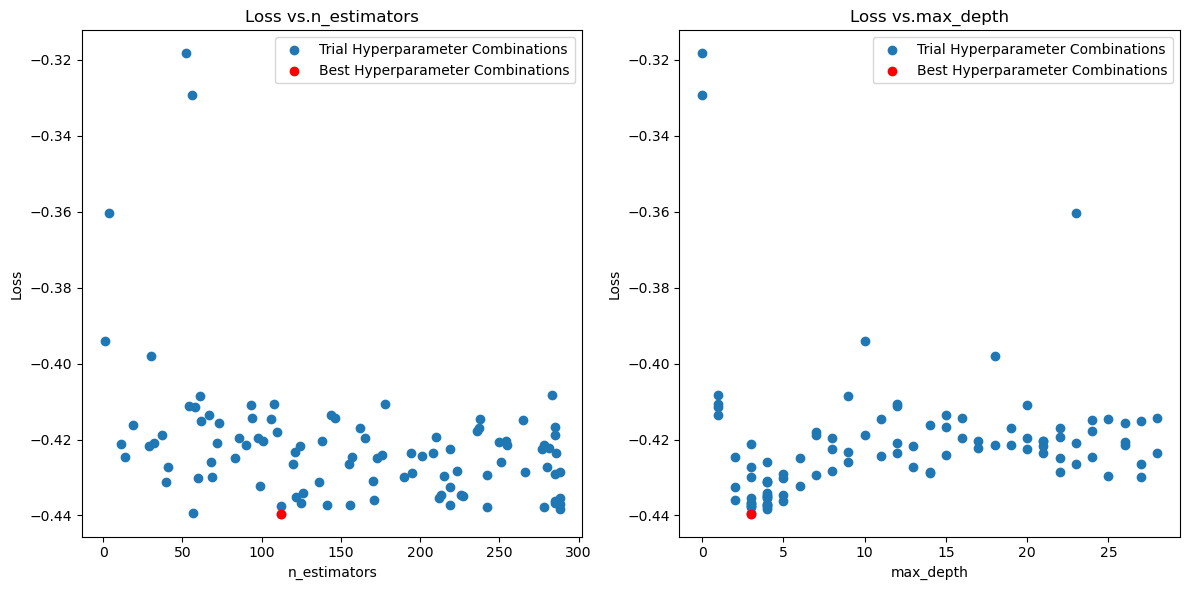

In [45]:
#plot optimization vs.hyperparameters in 2D

plot_obj_vs_hp(trials,search_space,best)

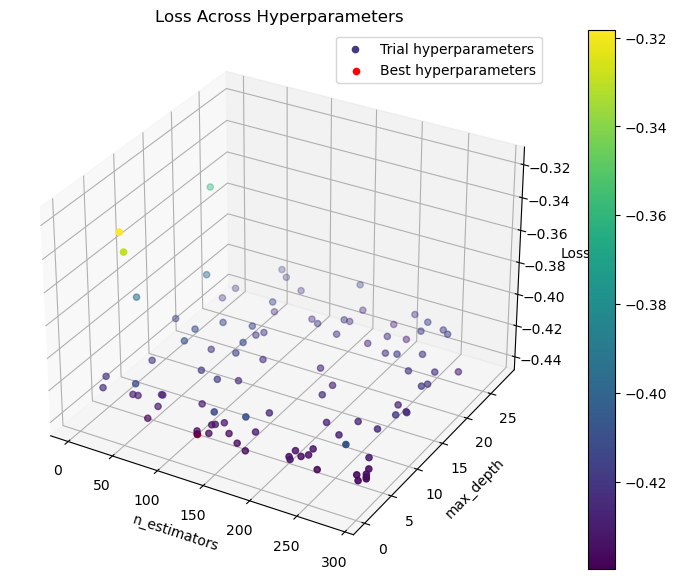

In [47]:
#plot optimization vs.hyperparameters in 3D
plot_obj_vs_hp_3d(trials,search_space,best)